# Imports

In [1]:
import keras
import mdn
from scipy.stats import norm
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Using TensorFlow backend.


# Load data

In [2]:
X_train = pd.read_csv('./data/X_train_normal.csv', usecols=['GAME_TIME', 'HT_SCORE_DIFF','HT_POSS'])
X_test_internal = pd.read_csv('./data/X_test_internal_normal.csv', usecols=['GAME_TIME', 'HT_SCORE_DIFF','HT_POSS'])
X_test_external = pd.read_csv('./data/X_test_external_normal.csv', usecols=['GAME_TIME', 'HT_SCORE_DIFF','HT_POSS'])
Y_train = pd.read_csv('./data/Y_train_binary.csv')
Y_test_internal = pd.read_csv('./data/Y_test_internal_binary.csv')
Y_test_external = pd.read_csv('./data/Y_test_external_binary.csv')

# Define neural network architecture

In [3]:
N_HIDDEN = 4
num_input_features = X_train.shape[1]
model = keras.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, input_dim=num_input_features, activation='tanh'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy', 'binary_accuracy'])
model.summary()

W0125 00:43:32.423195 4580476352 deprecation_wrapper.py:119] From /Users/henrypoole/anaconda3/envs/thesis-v2/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0125 00:43:32.493240 4580476352 deprecation_wrapper.py:119] From /Users/henrypoole/anaconda3/envs/thesis-v2/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0125 00:43:32.513210 4580476352 deprecation_wrapper.py:119] From /Users/henrypoole/anaconda3/envs/thesis-v2/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0125 00:43:32.568600 4580476352 deprecation_wrapper.py:119] From /Users/henrypoole/anaconda3/envs/thesis-v2/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


# Fit model

In [4]:
model_fit = model.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_test_internal, Y_test_internal), batch_size=32)

W0125 00:43:32.767235 4580476352 deprecation_wrapper.py:119] From /Users/henrypoole/anaconda3/envs/thesis-v2/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1989224 samples, validate on 224771 samples
Epoch 1/20
1989224/1989224 [==============================] - 129s 65us/step - loss: 0.4864 - acc: 0.7482 - binary_accuracy: 0.7482 - val_loss: 0.5033 - val_acc: 0.7385 - val_binary_accuracy: 0.7385
Epoch 2/20
1989224/1989224 [==============================] - 134s 67us/step - loss: 0.4826 - acc: 0.7484 - binary_accuracy: 0.7484 - val_loss: 0.5050 - val_acc: 0.7379 - val_binary_accuracy: 0.7379
Epoch 3/20
1989224/1989224 [==============================] - 135s 68us/step - loss: 0.4824 - acc: 0.7483 - binary_accuracy: 0.7483 - val_loss: 0.5034 - val_acc: 0.7366 - val_binary_accuracy: 0.7366
Epoch 4/20
1989224/1989224 [==============================] - 134s 67us/step - loss: 0.4822 - acc: 0.7484 - binary_accuracy: 0.7484 - val_loss: 0.5012 - val_acc: 0.7388 - val_binary_accuracy: 0.7388
Epoch 5/20
1989224/1989224 [==============================] - 147s 74us/step - loss: 0.4820 - acc: 0.7485 - binary_accuracy: 0.7485 - val_loss: 0.4989 

# Save model

In [5]:
model_json = model.to_json()
with open("base_nn_classification_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("base_nn_classification_model.h5")

# Plot training/validation loss

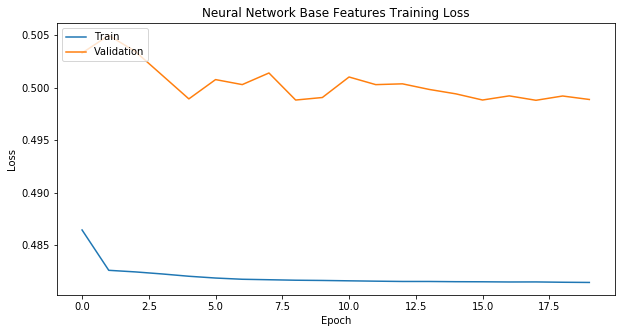

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Neural Network Base Features Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Make binary class and probabilistic predictions

In [7]:
# Make probabilistic predictions
Y_train_prob_pred = model.predict(X_train)[:, 0]
Y_test_internal_prob_pred = model.predict(X_test_internal)[:, 0]
Y_test_external_prob_pred = model.predict(X_test_external)[:, 0]

# Convert to binary predictions
Y_train_class_pred = np.where(Y_train_prob_pred <= 0.5, 0, 1)
Y_test_internal_class_pred = np.where(Y_test_internal_prob_pred <= 0.5, 0, 1)
Y_test_external_class_pred = np.where(Y_test_external_prob_pred <= 0.5, 0, 1)

# Save predictions as .csv
Y_train_pred = pd.DataFrame({'class_pred':Y_train_class_pred, 'prob_pred':Y_train_prob_pred})
Y_train_pred.to_csv('./data/nn_train_predictions.csv', index=False)

Y_test_internal_pred = pd.DataFrame({'class_pred':Y_test_internal_class_pred, 'prob_pred':Y_test_internal_prob_pred})
Y_test_internal_pred.to_csv('./data/nn_test_internal_predictions.csv', index=False)

Y_test_external_pred = pd.DataFrame({'class_pred':Y_test_external_class_pred, 'prob_pred':Y_test_external_prob_pred})
Y_test_external_pred.to_csv('./data/nn_test_external_predictions.csv', index=False)

# Evaluate Results

In [8]:
# Classification reports
train_classification_report = classification_report(Y_train, Y_train_class_pred, target_names=['Away Team Win', 'Home Team Win'], digits=4)
test_internal_classification_report = classification_report(Y_test_internal, Y_test_internal_class_pred, target_names=['Away Team Win', 'Home Team Win'], digits=4)
test_external_classification_report = classification_report(Y_test_external, Y_test_external_class_pred, target_names=['Away Team Win', 'Home Team Win'], digits=4)

In [9]:
print(train_classification_report)

               precision    recall  f1-score   support

Away Team Win     0.7323    0.5661    0.6386    779434
Home Team Win     0.7561    0.8666    0.8076   1209790

     accuracy                         0.7489   1989224
    macro avg     0.7442    0.7164    0.7231   1989224
 weighted avg     0.7468    0.7489    0.7414   1989224



In [10]:
print(test_internal_classification_report)

               precision    recall  f1-score   support

Away Team Win     0.7598    0.5727    0.6531     96760
Home Team Win     0.7277    0.8632    0.7897    128011

     accuracy                         0.7381    224771
    macro avg     0.7438    0.7179    0.7214    224771
 weighted avg     0.7415    0.7381    0.7309    224771



In [11]:
print(test_external_classification_report)

               precision    recall  f1-score   support

Away Team Win     0.7528    0.5850    0.6584    104262
Home Team Win     0.7108    0.8415    0.7707    126379

     accuracy                         0.7256    230641
    macro avg     0.7318    0.7133    0.7145    230641
 weighted avg     0.7298    0.7256    0.7199    230641



In [12]:
# Calculate log loss
train_log_loss = log_loss(Y_train, Y_train_prob_pred)
test_internal_log_loss = log_loss(Y_test_internal, Y_test_internal_prob_pred)
test_external_log_loss = log_loss(Y_test_external, Y_test_external_prob_pred)

In [13]:
print(train_log_loss)

0.48137628668758203


In [14]:
print(test_internal_log_loss)

0.49887431391452086


In [15]:
print(test_external_log_loss)

0.5043834833361469


In [16]:
# Calculate area under ROC curve

def plot_roc_curve(true, pred, title):
    fpr, tpr, threshold = roc_curve(true, pred)
    roc_auc = auc(fpr, tpr)
    plt.title('{} ROC Curve'.format(title))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

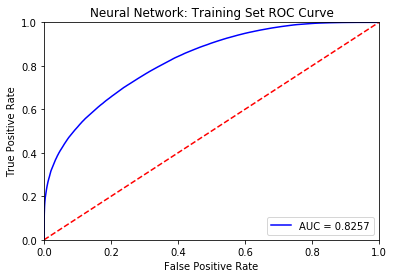

In [17]:
plot_roc_curve(Y_train, Y_train_prob_pred, 'Neural Network: Training Set')

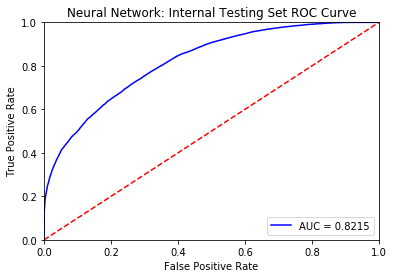

In [18]:
plot_roc_curve(Y_test_internal, Y_test_internal_prob_pred, 'Neural Network: Internal Testing Set')

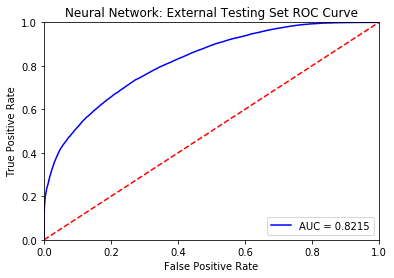

In [19]:
plot_roc_curve(Y_test_external, Y_test_external_prob_pred, 'Neural Network: External Testing Set')